# Create zonal-level snow dynamics results from IMS
- Zones: Canada, Ecozones, Tiles

In [1]:
#import pandas as pd
import polars as pl
import numpy as np
import datetime as dt
import geopandas as gpd

from scipy.stats import mode

import sys
sys.path.append('C:/Users/mbonney/OneDrive - NRCan RNCan/Projects/UtilityCode/Visualization/Utilities')
import Viz_Utils as vutil

# Load dataframes
- From SnowCalculate_Zonal

## Canada

In [2]:
%%time
# Pandas
# cdf = pd.read_csv('IMS_pSnow_Canada.csv') # index_col = 'time'
# cdf['time'] = pd.to_datetime(cdf['time'])
# cdf = cdf.set_index('time')

# Polars
cdf = pl.read_csv('Outputs/IMS_pSnow_Canada.csv') # schema_overrides = {'Canada': pl.Float32}

cdf = cdf.with_columns(pl.col('time').str.to_date())

c_cols = cdf.select(pl.exclude('time')).columns
cdf = cdf.with_columns(pl.col(c_cols).cast(pl.Float32)) # .alias(c_cols)

#cdf.write_csv('IMS_pSnow_Canada.csv')

cdf

CPU times: total: 0 ns
Wall time: 352 ms


time,Canada
date,f32
2018-01-01,97.071854
2018-01-02,97.162224
2018-01-03,97.035889
2018-01-04,97.127022
2018-01-05,97.10685
…,…
2024-12-27,95.109009
2024-12-28,94.962524
2024-12-29,94.829109


In [3]:
#cdf.plot.line(x = 'time', y = 'Canada')

## Ecozones

In [4]:
%%time
edf = pl.read_csv('Outputs/IMS_pSnow_CanadaEcozones.csv')

edf = edf.with_columns(pl.col('time').str.to_date())

e_cols = edf.select(pl.exclude('time')).columns
edf = edf.with_columns(pl.col(e_cols).cast(pl.Float32))

#edf.write_csv('IMS_pSnow_CanadaEcozones.csv')

edf

CPU times: total: 0 ns
Wall time: 68.5 ms


time,Arctic Cordillera,Atlantic Maritime,Boreal Cordillera,Boreal Plains,Boreal Shield,Hudson Plains,Mixedwood Plains,Montane Cordillera,Northern Arctic,Pacific Maritime,Prairies,Southern Arctic,Taiga Cordillera,Taiga Plains,Taiga Shield
date,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32
2018-01-01,99.81189,77.187393,99.997299,99.989075,95.093628,99.987816,79.731293,98.440773,99.990242,63.977737,99.997826,99.994377,100.0,99.998711,99.361198
2018-01-02,99.81189,80.183556,99.997299,99.989075,95.167503,99.987816,79.661926,98.440773,99.990242,64.187317,99.997826,99.994377,100.0,99.998711,99.361198
2018-01-03,99.81189,75.163193,99.997299,99.989075,95.167557,99.987816,79.661926,98.605026,99.990242,63.684906,99.997826,99.994377,100.0,99.998711,99.361198
2018-01-04,99.87085,77.527229,99.997299,99.989075,95.142723,99.987816,79.661926,98.605026,99.990242,63.684906,99.997826,99.994377,100.0,99.998711,99.626411
2018-01-05,99.87085,77.527229,99.997299,99.566063,95.143082,99.987816,80.164543,98.605026,99.990242,63.684906,99.997826,99.994377,100.0,99.998711,99.626411
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2024-12-27,97.409096,78.140259,99.988983,99.974075,92.563171,99.001968,65.241615,96.187096,99.408386,57.571968,94.659973,95.950706,100.0,99.99984,97.679398
2024-12-28,97.495995,78.270813,99.988983,99.974075,92.645554,99.005272,57.742626,96.189194,99.288475,57.571968,93.529198,96.166473,100.0,99.99984,97.75737
2024-12-29,97.676262,78.270813,99.988983,99.775818,92.645554,98.795815,51.127209,96.776932,99.167015,57.571968,93.181229,96.199677,100.0,99.99984,97.768265


### Tiles

In [5]:
%%time
tdf = pl.read_csv('Outputs/IMS_pSnow_CanadaTiles60km.csv')

tdf = tdf.with_columns(pl.col('time').str.to_date())

t_cols = tdf.select(pl.exclude('time')).columns
tdf = tdf.with_columns(pl.col(t_cols).cast(pl.Float32))

#tdf.write_csv('IMS_pSnow_CanadaTiles60km.csv')

tdf

CPU times: total: 26.6 s
Wall time: 11.1 s


time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,…,3354,3355,3356,3357,3358,3359,3360,3361,3362,3363,3364,3365,3366,3367,3368,3369,3370,3371,3372,3373,3374,3375,3376,3377,3378,3379,3380,3381,3382,3383,3384,3385,3386,3387,3388,3389,3390
date,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,…,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32
2018-01-01,100.0,100.0,40.928074,0.0,100.0,100.0,75.138885,16.926771,0.338409,95.527153,100.0,99.416664,93.126572,14.285714,87.5,3.900709,80.944443,100.0,100.0,99.5,100.0,4.0,94.111115,100.0,100.0,61.607143,6.304729,0.0,2.230239,68.555557,100.0,100.0,97.111115,63.56546,46.033897,33.385826,…,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,99.888855,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,99.64286,100.0
2018-01-02,100.0,100.0,40.928074,0.0,100.0,100.0,73.055557,16.926771,0.338409,95.527153,100.0,99.416664,91.86924,14.179894,87.5,3.900709,80.944443,100.0,100.0,99.5,100.0,4.0,94.111115,100.0,100.0,61.607143,6.304729,0.0,2.230239,68.555557,100.0,100.0,97.111115,63.56546,46.033897,33.385826,…,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,99.888855,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,99.64286,100.0
2018-01-03,100.0,100.0,40.928074,0.0,100.0,100.0,73.055557,16.926771,0.338409,95.527153,100.0,99.416664,91.86924,14.179894,87.5,3.900709,80.944443,100.0,100.0,99.5,100.0,4.0,94.111115,100.0,100.0,61.607143,6.304729,0.0,2.230239,68.555557,100.0,100.0,97.111115,63.56546,46.033897,33.385826,…,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,99.888855,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,99.64286,100.0
2018-01-04,100.0,100.0,40.928074,0.0,100.0,100.0,73.055557,16.926771,0.338409,95.527153,100.0,99.416664,91.86924,14.179894,87.5,3.900709,80.944443,100.0,100.0,99.5,100.0,4.0,94.111115,100.0,100.0,61.607143,6.304729,0.0,2.230239,68.555557,100.0,100.0,97.111115,63.56546,46.033897,33.385826,…,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,99.888855,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,99.64286,100.0
2018-01-05,100.0,99.103142,95.359627,0.0,100.0,100.0,87.888885,29.171669,3.891709,100.0,100.0,94.916664,97.122101,25.978836,0.0,13.711584,80.944443,100.0,100.0,83.472221,86.337212,4.0,94.111115,100.0,100.0,45.44931,6.304729,0.0,2.230239,68.555557,100.0,100.0,97.111115,63.56546,46.033897,33.385826,…,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,99.888855,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,99.64286,100.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2024-12-27,10.0,45.195389,1.206496,0.0,0.0,78.601204,65.861115,0.20008,0.0,68.610222,98.222221,76.305557,48.700756,1.746032,0.0,0.0,63.083332,100.0,100.0,73.5,62.306202,0.0,75.583336,100.0,100.0,40.956223,1.225919,0.0,0.0,58.972221,98.805557,98.027779,92.027779,55.013927,13.016949,0.0,…,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
2024-12-28,0.0,0.0,0.0,0.0,0.0,21.167208,0.0,0.0,0.0,29.153355,26.833334,12.75,0.0,0.0,0.0,0.0,63.083332,99.083336,68.888885,36.111111,47.868

# Smooth dataframes
- 31 day median rolling window

## Canada

In [6]:
%%time

# Pandas
# cdf_sm = cdf.copy()
# cdf_sm['Canada'] = cdf_sm['Canada'].rolling(31, min_periods = 1, center = True).median()

# Polars
cdf_sm = cdf.rolling(index_column = 'time', period = '31d', offset = '-16d').agg([pl.median(c_cols)])
cdf_sm

CPU times: total: 0 ns
Wall time: 8.66 ms


time,Canada
date,f32
2018-01-01,97.269577
2018-01-02,97.307777
2018-01-03,97.322258
2018-01-04,97.336739
2018-01-05,97.322258
…,…
2024-12-27,93.941803
2024-12-28,94.457596
2024-12-29,94.618835


In [7]:
#cdf - cdf_sm
# cdf_sm.write_csv('cdf_sm.csv')

## Ecozones

In [8]:
%%time
edf_sm = edf.rolling(index_column = 'time', period = '31d', offset = '-16d').agg([pl.median(e_cols)])
edf_sm

CPU times: total: 0 ns
Wall time: 53.8 ms


time,Arctic Cordillera,Atlantic Maritime,Boreal Cordillera,Boreal Plains,Boreal Shield,Hudson Plains,Mixedwood Plains,Montane Cordillera,Northern Arctic,Pacific Maritime,Prairies,Southern Arctic,Taiga Cordillera,Taiga Plains,Taiga Shield
date,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32
2018-01-01,99.931503,81.162529,99.997299,99.989075,95.201393,99.987816,82.320602,98.605026,99.990242,63.684906,99.997826,99.994377,100.0,99.998711,99.643768
2018-01-02,99.99012,81.162529,99.997299,99.989075,95.201393,99.987816,82.509369,98.605026,99.990242,63.684906,99.997826,99.994377,100.0,99.998711,99.661125
2018-01-03,99.99012,81.292114,99.997299,99.989075,95.230988,99.987816,82.646683,98.605026,99.990242,63.509167,99.997826,99.994377,100.0,99.998711,99.816566
2018-01-04,99.99012,81.421692,99.997299,99.989075,95.260574,99.987816,82.783989,98.605026,99.990242,63.333427,99.997826,99.994377,100.0,99.998711,99.972008
2018-01-05,99.99012,82.600784,99.997299,99.989075,95.27375,99.987816,82.888039,98.605026,99.990242,63.333427,99.997826,99.994377,100.0,99.998711,99.972008
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2024-12-27,97.043274,63.267403,99.988983,99.874947,90.626724,98.518188,52.607506,96.188141,98.693039,57.42514,94.820709,95.838333,100.0,99.99984,97.552124
2024-12-28,97.13546,63.820415,99.988983,99.974075,91.79464,98.526443,51.127209,96.189194,98.705696,57.42514,94.776833,95.87294,100.0,99.99984,97.566849
2024-12-29,97.14875,70.818604,99.988983,99.974075,91.79464,98.553101,51.02771,96.276962,98.825195,57.42514,94.718399,95.911819,100.0,99.99984,97.56842


## Tiles

In [9]:
%%time
tdf_sm = tdf.rolling(index_column = 'time', period = '31d', offset = '-16d').agg([pl.median(t_cols)])
tdf_sm

CPU times: total: 1.64 s
Wall time: 115 ms


time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,…,3354,3355,3356,3357,3358,3359,3360,3361,3362,3363,3364,3365,3366,3367,3368,3369,3370,3371,3372,3373,3374,3375,3376,3377,3378,3379,3380,3381,3382,3383,3384,3385,3386,3387,3388,3389,3390
date,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,…,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32
2018-01-01,100.0,100.0,99.396751,100.0,100.0,100.0,94.833328,100.0,100.0,98.801918,100.0,100.0,91.897179,26.560846,100.0,16.075649,81.0,100.0,100.0,87.458328,100.0,4.0,94.111115,100.0,100.0,46.70219,6.304729,0.0,2.230239,68.555557,100.0,100.0,97.111115,57.075211,28.355932,33.385826,…,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,99.888855,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,99.64286,100.0
2018-01-02,100.0,100.0,100.0,100.0,100.0,100.0,96.916664,100.0,100.0,100.0,100.0,100.0,91.897179,27.142857,100.0,16.075649,81.0,100.0,100.0,87.277779,100.0,4.0,94.111115,100.0,100.0,45.44931,6.304729,0.0,2.230239,68.555557,100.0,100.0,97.111115,57.075211,31.050848,33.385826,…,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,99.888855,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,99.64286,100.0
2018-01-03,100.0,100.0,100.0,100.0,100.0,100.0,97.0,100.0,100.0,100.0,100.0,100.0,92.511871,27.142857,100.0,16.075649,86.875,100.0,100.0,87.083328,100.0,4.0,94.708336,100.0,100.0,45.44931,6.304729,0.0,2.230239,68.555557,100.0,100.0,97.111115,57.075211,31.050848,33.385826,…,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,99.888855,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,99.64286,100.0
2018-01-04,100.0,100.0,100.0,100.0,100.0,100.0,97.083336,100.0,100.0,100.0,100.0,100.0,93.126572,27.142857,100.0,16.075649,92.75,100.0,100.0,86.888885,100.0,4.0,94.111115,100.0,100.0,45.44931,6.304729,0.0,2.230239,68.555557,100.0,100.0,97.111115,57.075211,31.050848,33.385826,…,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,99.888855,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,99.64286,100.0
2018-01-05,100.0,100.0,100.0,100.0,100.0,100.0,98.458336,100.0,100.0,98.801918,100.0,100.0,93.79715,27.142857,100.0,16.075649,93.208328,100.0,100.0,86.888885,100.0,4.0,94.111115,100.0,100.0,43.75,6.304729,0.0,2.230239,68.555557,100.0,100.0,97.111115,57.075211,38.237289,33.385826,…,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,99.888855,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,99.64286,100.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2024-12-27,0.0,0.0,0.0,0.0,0.0,23.622047,19.222221,0.0,0.0,36.341854,33.305557,12.666666,0.0,0.0,0.0,0.0,59.069443,91.597229,47.125,8.291667,25.872093,0.0,75.583336,100.0,98.0,23.646313,0.0,0.0,0.0,58.972221,98.805557,98.027779,90.333336,54.623955,13.050847,0.0,…,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
2024-12-28,0.0,0.0,0.0,0.0,0.0,26.076887,29.527779,0.0,0.0,36.341854,33.305557,12.583333,0.0,0.0,0.0,0.0,63.083332,84.111115,38.0,0.916667,25.872093,0.0,75.583336,100.0,98.0,23.646313,0.0,0.0,0.0,58.972221,98.805557,98.027779,90.33333

# Find periods
From smoothed time-series

1. Snow/Ice Free Period (<1%)
2. Transitional Period (1 - 90%)
3. Snow/Ice Period (90+%)

Use weekly mode to smooth

## Canada

In [10]:
%%time
# Pandas
# cdf_p = cdf_sm.copy()

# # Initial periods
# cdf_p[(cdf_p >= 1) & (cdf_p < 90)] = 2 # Transitional Period
# cdf_p[cdf_p < 1] = 1 # Snow/Ice Free Period
# cdf_p[cdf_p >= 90] = 3 # Snow/Ice Period

# # Weekly Rolling mode, then fill edges
# cdf_p = cdf_p.rolling(window = 7, center = True).apply(lambda x: mode(x)[0]).bfill().ffill()

# Polars

# Initial periods
cdf_p = cdf_sm.with_columns(pl.when(pl.col(c_cols).is_between(1, 90, closed = 'left')).then(2).otherwise(pl.col(c_cols)).name.keep())
cdf_p = cdf_p.with_columns(pl.when(pl.col(c_cols) < 1).then(1).otherwise(pl.col(c_cols)).name.keep())
cdf_p = cdf_p.with_columns(pl.when(pl.col(c_cols) > 90 ).then(3).otherwise(pl.col(c_cols)).name.keep())

cdf_p = cdf_p.with_columns(pl.col(c_cols).cast(pl.Int8).name.keep()) # Limit dtype

# Weekly rolling mode, then fill edges
cdf_p = cdf_p.rolling(index_column = 'time', period = '7d', offset = '-4d').agg(pl.col(c_cols).mode().get(0))

cdf_p

CPU times: total: 15.6 ms
Wall time: 97.8 ms


time,Canada
date,i8
2018-01-01,3
2018-01-02,3
2018-01-03,3
2018-01-04,3
2018-01-05,3
…,…
2024-12-27,3
2024-12-28,3
2024-12-29,3


In [11]:
#cdf_p.plot.line(x = 'time', y = 'Canada')

## Ecozones

In [12]:
%%time

# Initial periods
edf_p = edf_sm.with_columns(pl.when(pl.col(e_cols).is_between(1, 90, closed = 'left')).then(2).otherwise(pl.col(e_cols)).name.keep())
edf_p = edf_p.with_columns(pl.when(pl.col(e_cols) < 1).then(1).otherwise(pl.col(e_cols)).name.keep())
edf_p = edf_p.with_columns(pl.when(pl.col(e_cols) > 90 ).then(3).otherwise(pl.col(e_cols)).name.keep())

edf_p = edf_p.with_columns(pl.col(e_cols).cast(pl.Int8).name.keep())

# Weekly rolling mode, then fill edges
edf_p = edf_p.rolling(index_column = 'time', period = '7d', offset = '-4d').agg(pl.col(e_cols).mode().get(0))

edf_p

CPU times: total: 62.5 ms
Wall time: 605 ms


time,Arctic Cordillera,Atlantic Maritime,Boreal Cordillera,Boreal Plains,Boreal Shield,Hudson Plains,Mixedwood Plains,Montane Cordillera,Northern Arctic,Pacific Maritime,Prairies,Southern Arctic,Taiga Cordillera,Taiga Plains,Taiga Shield
date,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8
2018-01-01,3,2,3,3,3,3,2,3,3,2,3,3,3,3,3
2018-01-02,3,2,3,3,3,3,2,3,3,2,3,3,3,3,3
2018-01-03,3,2,3,3,3,3,2,3,3,2,3,3,3,3,3
2018-01-04,3,2,3,3,3,3,2,3,3,2,3,3,3,3,3
2018-01-05,3,2,3,3,3,3,2,3,3,2,3,3,3,3,3
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2024-12-27,3,2,3,3,3,3,2,3,3,2,3,3,3,3,3
2024-12-28,3,2,3,3,3,3,2,3,3,2,3,3,3,3,3
2024-12-29,3,2,3,3,3,3,2,3,3,2,3,3,3,3,3


## Tiles

In [13]:
%%time

# Initial periods
tdf_p = tdf_sm.with_columns(pl.when(pl.col(t_cols).is_between(1, 90, closed = 'left')).then(2).otherwise(pl.col(t_cols)).name.keep())
tdf_p = tdf_p.with_columns(pl.when(pl.col(t_cols) < 1).then(1).otherwise(pl.col(t_cols)).name.keep())
tdf_p = tdf_p.with_columns(pl.when(pl.col(t_cols) >= 90 ).then(3).otherwise(pl.col(t_cols)).name.keep())

tdf_p = tdf_p.with_columns(pl.col(t_cols).cast(pl.Int8).name.keep())

# Weekly rolling mode, then fill edges
tdf_p = tdf_p.rolling(index_column = 'time', period = '7d', offset = '-4d').agg(pl.col(t_cols).mode().get(0))

tdf_p

CPU times: total: 15.2 s
Wall time: 2min 42s


time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,…,3354,3355,3356,3357,3358,3359,3360,3361,3362,3363,3364,3365,3366,3367,3368,3369,3370,3371,3372,3373,3374,3375,3376,3377,3378,3379,3380,3381,3382,3383,3384,3385,3386,3387,3388,3389,3390
date,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,…,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8
2018-01-01,3,3,3,3,3,3,3,3,3,3,3,3,3,2,3,2,2,3,3,2,3,2,3,3,3,2,2,1,2,2,3,3,3,2,2,2,…,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2018-01-02,3,3,3,3,3,3,3,3,3,3,3,3,3,2,3,2,2,3,3,2,3,2,3,3,3,2,2,1,2,2,3,3,3,2,2,2,…,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2018-01-03,3,3,3,3,3,3,3,3,3,3,3,3,3,2,3,2,2,3,3,2,3,2,3,3,3,2,2,1,2,2,3,3,3,2,2,2,…,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2018-01-04,3,3,3,3,3,3,3,3,3,3,3,3,3,2,3,2,3,3,3,2,3,2,3,3,3,2,2,1,2,2,3,3,3,2,2,2,…,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2018-01-05,3,3,3,3,3,3,3,3,3,3,3,3,3,2,3,2,3,3,3,2,3,2,3,3,3,2,2,1,2,2,3,3,3,2,2,2,…,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2024-12-27,1,1,1,1,1,2,2,1,1,2,2,2,1,1,1,1,2,2,2,2,2,1,2,3,3,2,1,1,1,2,3,3,3,2,2,1,…,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2024-12-28,1,1,1,1,1,2,2,1,1,2,2,2,1,1,1,1,2,2,2,2,2,1,2,3,3,2,1,1,1,2,3,3,3,2,2,1,…,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2024-12-29,1,1,1,1,1,2,2,1,1,2,2,2,1,1,1,1,2,2,2,2,2,1,2,3,3,2,1,1,1,2,3,3,3,2,2,1,…,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


# Plot

## Canada

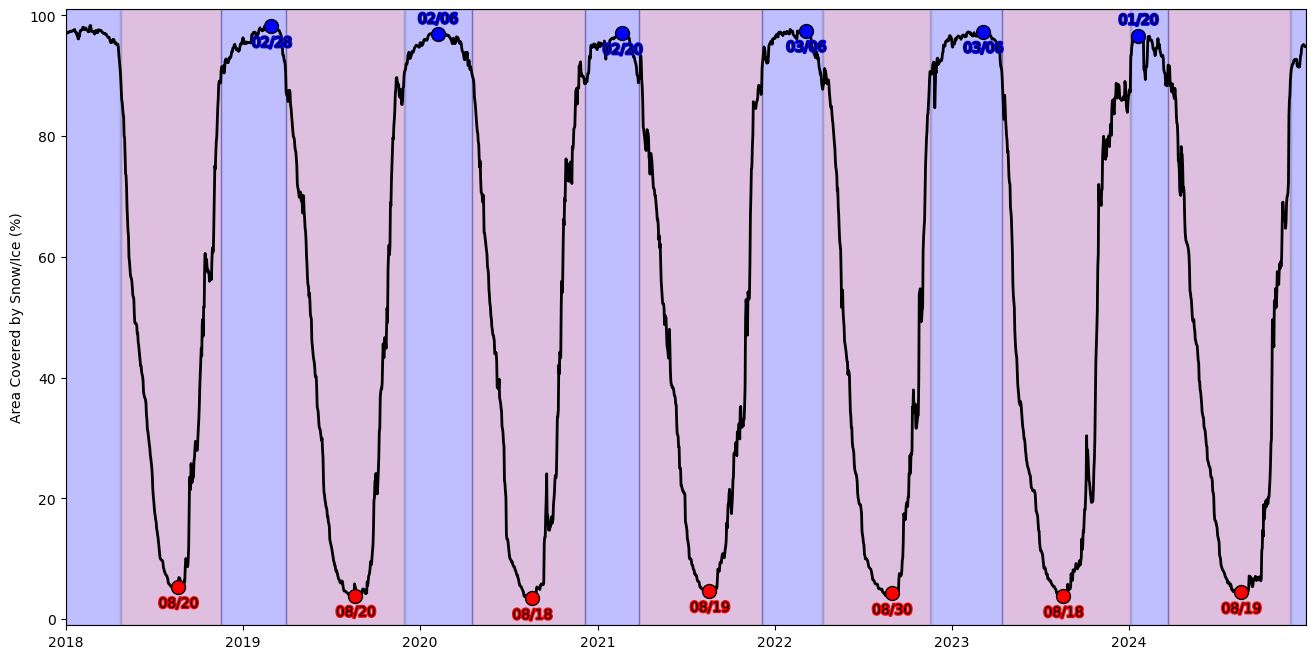

In [14]:
plot = vutil.timeSeriesPlot(cdf, 'Canada', 'ims')

## Ecozones

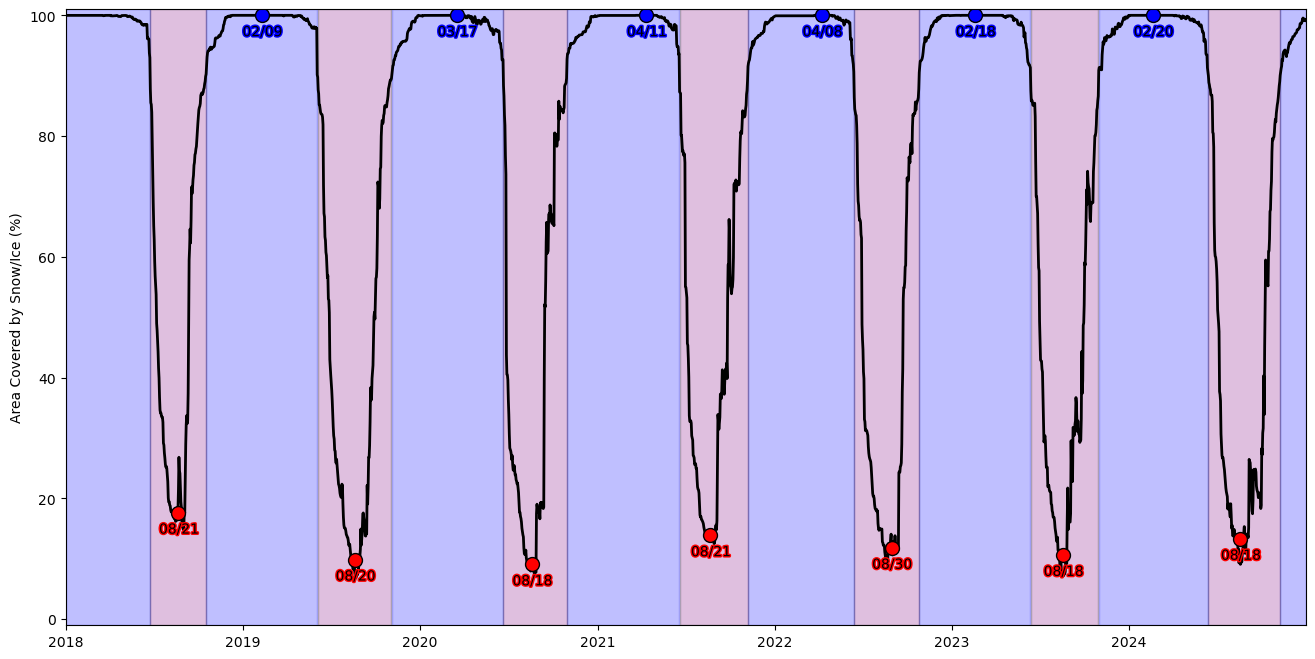

In [15]:
zone = 'Northern Arctic'
plot = vutil.timeSeriesPlot(edf, zone, form = 'ims')

## Tiles

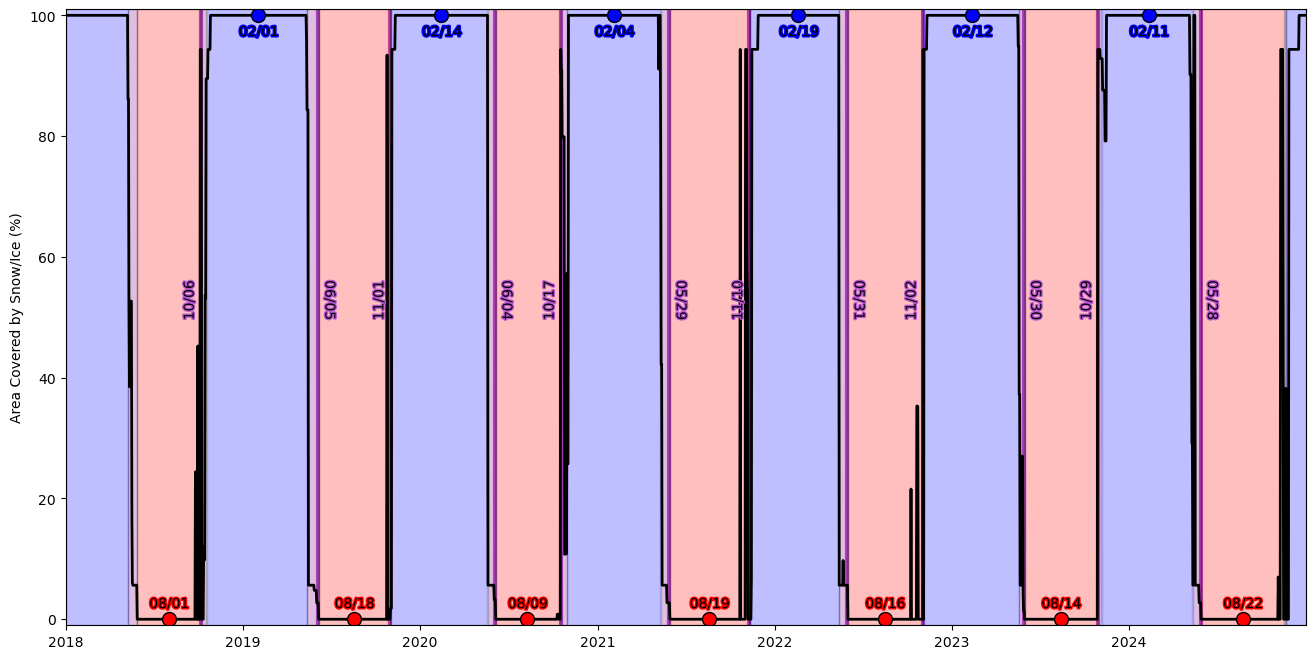

In [16]:
zone = '904'
plot = vutil.timeSeriesPlot(tdf, zone, form = 'ims')

In [17]:
#tdf_sm['time', zone].filter(pl.col('time').is_between(dt.date(2021, 6, 18), dt.date(2021, 11, 2))).plot.line(x = 'time', y = zone) 

In [18]:
#tdf_p[zone].plot.line(x = 'time', y = zone)

In [19]:
#np.unique(tdf_p['0'], return_counts = True)

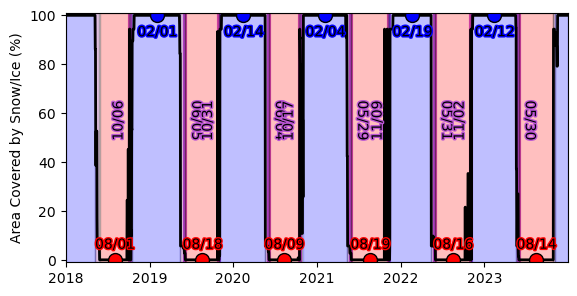

In [21]:
import matplotlib.pyplot as plt

zone = '904'
plot = vutil.timeSeriesPlot(tdf[0:2191], zone, form = 'ims', save = 'Figure 5.tif')

#plot.savefig('Figure 5.tif', dpi = 600, bbox_inches = 'tight', pil_kwargs = {'compression': 'tiff_lzw'})

# Winter Year Statistics

## Snow Minimum (Day of Year)
- Starting with smoothed time-series
- Day with least amount of snow
- If multiple days have same low amount, center day

### Canada

In [ ]:
# Create a dataframe to fill
cdf_smin = pl.DataFrame({'Year': np.unique(cdf_sm['time'].dt.year())})

dates = []

for year in np.unique(cdf_sm['time'].dt.year()): # For each year

    # Filter to year
    cdf_sm_y = cdf_sm.filter(pl.col('time').is_between(dt.date(year, 1, 1), dt.date(year, 12, 31))) 

    # Find all time-steps with minimum value and get median date
    smin = cdf_sm_y.with_columns(pl.when(pl.col('Canada') == cdf_sm_y.min()['Canada'])
                                     .then(cdf_sm_y.min()['Canada']).name.keep()).drop_nulls().median()

    # Append to dates
    dates.append(smin['time'][0].date())  

# Add column to dataframe
cdf_smin = cdf_smin.with_columns(pl.Series(name = 'Canada', values = dates))  

cdf_smin 

In [ ]:
cdf_smin['Canada'].dt.ordinal_day().mean()
# 233 = August 21

### Ecozones

In [ ]:
# Create a dataframe to fill
edf_smin = pl.DataFrame({'Year': np.unique(edf_sm['time'].dt.year())})

for ezone in e_cols: # For each tile

    dates = []

    # Select ecozone smoothed time-series
    edf_sm_e = edf_sm['time', ezone]
        
    for year in np.unique(edf_sm['time'].dt.year()): # For each year

        # Filter to year
        edf_sm_e_y = edf_sm_e.filter(pl.col('time').is_between(dt.date(year, 1, 1), dt.date(year, 12, 31))) 

        # Find all time-steps with minimum value and get median date
        smin = edf_sm_e_y.with_columns(pl.when(pl.col(ezone) == edf_sm_e_y.min()[ezone])
                                         .then(edf_sm_e_y.min()[ezone]).name.keep()).drop_nulls().median()
        
        # Append to dates
        dates.append(smin['time'][0].date())

    # Add column to dataframe
    edf_smin = edf_smin.with_columns(pl.Series(name = ezone, values = dates))

edf_smin

In [ ]:
edf_smin.with_columns(pl.col(e_cols).dt.ordinal_day().name.keep()).mean()
# Arctic Cordillera = August 18
# Atlantic Maritime = August 27
# Boreal Cordillera = August 15
# Boreal Plains = August 18
# Boreal Shield = August 24
# Hudson Plains = September 7
# Mixedwood Plains = August 10
# Montane Cordillera = September 9
# Northern Arctic = August 21
# Pacific Maritime = September 18
# Prairies = August 4
# Southern Arctic = August 26
# Taiga Cordillera = August 9
# Taiga Plains = August 9
# Taiga Shield = August 23

### Tiles

In [ ]:
%%time
# Create a dataframe to fill
tdf_smin = pl.DataFrame({'Year': np.unique(tdf_sm['time'].dt.year())})

for tile in t_cols: # For each tile (10 first for testing)

    dates = []

    # Select tile smoothed time-series
    tdf_sm_t = tdf_sm['time', tile]

    # Deal with no-pixel tiles
    if tdf_sm_t.null_count()[tile][0] > 0:
        print('Tile ' + tile + ' contains no IMS snow information')
        tdf_smin = tdf_smin.with_columns(pl.Series(name = tile, values = [None] * len(tdf_smin)))
        
    else:
        for year in np.unique(tdf_sm['time'].dt.year()): # For each year
    
            # Filter to year
            tdf_sm_t_y = tdf_sm_t.filter(pl.col('time').is_between(dt.date(year, 1, 1), dt.date(year, 12, 31))) 
    
            # Find all time-steps with minimum value and get median date
            smin = tdf_sm_t_y.with_columns(pl.when(pl.col(tile) == tdf_sm_t_y.min()[tile])
                                             .then(tdf_sm_t_y.min()[tile]).name.keep()).drop_nulls().median()
            
            # Append to dates
            dates.append(smin['time'][0].date())
    
        # Add column to dataframe
        tdf_smin = tdf_smin.with_columns(pl.Series(name = tile, values = dates))

tdf_smin

In [ ]:
tdf_smin.write_csv('tiles_snowMinDateYear.csv')

In [ ]:
# Remove empty empty date polys from list
t_cols_rm = t_cols.copy()

t_cols_rm.remove('400')
t_cols_rm.remove('2002')
t_cols_rm.remove('2139')
t_cols_rm.remove('2932')

# Convert to Julian day
tdf_smin_j = tdf_smin.with_columns(pl.col(t_cols_rm).dt.ordinal_day().name.keep())
tdf_smin_j

## Length of Winter Year (Days)

### Canada

In [ ]:
# Create a dataframe to fill
years = np.unique(cdf_sm['time'].dt.year())

winters = []

for winter in range(len(years) - 1):
   winters.append(str(years[winter]) + '-' + str(years[winter + 1]))

cdf_wyl = pl.DataFrame({'Winter': winters})

days = []

for winter in range(len(cdf_wyl)): # For each winter year

    # Find number of days
    days.append((cdf_smin['Canada'][winter + 1] - cdf_smin['Canada'][winter]).days) 

# Add column to dataframe
cdf_wyl = cdf_wyl.with_columns(pl.Series(name = 'Canada', values = days))   

cdf_wyl

In [ ]:
cdf_wyl['Canada'].mean()

### Ecozones

In [ ]:
%%time

# Create a dataframe to fill
years = np.unique(edf_sm['time'].dt.year())

winters = []

for winter in range(len(years) - 1):
   winters.append(str(years[winter]) + '-' + str(years[winter + 1]))    

edf_wyl = pl.DataFrame({'Winter': winters})

for ezone in e_cols: # For each tile

    days = []

    # Select ecozone snow minimum dates
    edf_smin_e = edf_smin[ezone]

    for winter in range(len(edf_wyl)): # For each winter year

        # Find number of days
        days.append((edf_smin[ezone][winter + 1] - edf_smin[ezone][winter]).days) 

    # Add column to dataframe
    edf_wyl = edf_wyl.with_columns(pl.Series(name = ezone, values = days))

edf_wyl

In [ ]:
edf_wyl.with_columns(pl.col(e_cols).name.keep()).mean()
# Arctic Cordillera = 363
# Atlantic Maritime = 364
# Boreal Cordillera = 364
# Boreal Plains = 369
# Boreal Shield = 369
# Hudson Plains = 370
# Mixedwood Plains = 364
# Montane Cordillera = 367
# Northern Arctic = 365
# Pacific Maritime = 368
# Prairies = 368
# Southern Arctic = 369
# Taiga Cordillera = 367
# Taiga Plains = 365
# Taiga Shield = 365

### Tiles

In [ ]:
%%time

# Create a dataframe to fill
years = np.unique(tdf_sm['time'].dt.year())

winters = []

for winter in range(len(years) - 1):
   winters.append(str(years[winter]) + '-' + str(years[winter + 1]))    

tdf_wyl = pl.DataFrame({'Winter': winters})

for tile in t_cols: # For each tile

    days = []

    # Select tile snow minimum dates
    tdf_smin_t = tdf_smin[tile]

    # Deal with no-pixel tiles
    if tdf_smin_t.null_count() > 0:
        print('Tile ' + tile + ' contains no IMS snow information')
        tdf_wyl = tdf_wyl.with_columns(pl.Series(name = tile, values = [None] * len(winters)))

    else:
        for winter in range(len(tdf_wyl)): # For each winter year

            # Find number of days (start and end included)
            days.append((tdf_smin[tile][winter + 1] - tdf_smin[tile][winter]).days) 

        # Add column to dataframe
        tdf_wyl = tdf_wyl.with_columns(pl.Series(name = tile, values = days))

tdf_wyl

## Snow Maximum (Day of Year)

### Canada

In [ ]:
# Create a dataframe to fill
years = np.unique(cdf_sm['time'].dt.year())

winters = []

for winter in range(len(years) - 1):
   winters.append(str(years[winter]) + '-' + str(years[winter + 1]))

cdf_smax = pl.DataFrame({'Winter': winters})

dates = []

for winter in range(len(cdf_wyl)): # For each winter year

    # Filter to winter year
    cdf_sm_wy = cdf_sm.filter(pl.col('time').is_between(cdf_smin['Canada'][winter], cdf_smin['Canada'][winter + 1],
                                                        closed = 'right')) # Day after minimum to minimum

    # Find all tme-steps with maximum value and get median date
    smax = cdf_sm_wy.with_columns(pl.when(pl.col('Canada') == cdf_sm_wy.max()['Canada'])
                                    .then(cdf_sm_wy.max()['Canada']).name.keep()).drop_nulls().median()

    # Append to dates
    dates.append(smax['time'][0].date())    
    
# Add column to dataframe
cdf_smax = cdf_smax.with_columns(pl.Series(name = 'Canada', values = dates))   

cdf_smax

In [ ]:
cdf_smax['Canada'].dt.ordinal_day().mean()
# 50 = February 19

### Ecozone

In [ ]:
# Create a dataframe to fill
years = np.unique(edf_sm['time'].dt.year())

winters = []

for winter in range(len(years) - 1):
   winters.append(str(years[winter]) + '-' + str(years[winter + 1]))    

edf_smax = pl.DataFrame({'Winter': winters})

for ezone in e_cols: # For each ecozone

    dates = []

    # Select ecozone smoothed time-series
    edf_sm_e = edf_sm['time', ezone]

    for winter in range(len(edf_smax)): # For each winter year

        # Filter to winter year
        edf_sm_e_wy = edf_sm_e.filter(pl.col('time').is_between(edf_smin[ezone][winter], edf_smin[ezone][winter + 1],
                                                                closed = 'right')) # Day after minimum to minimum
        
        # Find all tme-steps with maximum value and get median date
        smax = edf_sm_e_wy.with_columns(pl.when(pl.col(ezone) == edf_sm_e_wy.max()[ezone])
                                          .then(edf_sm_e_wy.max()[ezone]).name.keep()).drop_nulls().median()

        # Append to dates
        dates.append(smax['time'][0].date())  

    # Add column to dataframe
    edf_smax = edf_smax.with_columns(pl.Series(name = ezone, values = dates))

edf_smax

In [ ]:
#edf_smax.with_columns(pl.col(e_cols).dt.ordinal_day().name.keep()) # Not reasonable for December dates 

# Create a dataframe to fill
years = np.unique(edf_sm['time'].dt.year())

winters = []

for winter in range(len(years) - 1):
   winters.append(str(years[winter]) + '-' + str(years[winter + 1]))    

edf_smax_j = pl.DataFrame({'Winter': winters})

for ezone in e_cols: # For each ecozone

    days = []

    for winter in range(len(edf_smax_j)): # For each winter year

        # Find Days from December 31 in winter year (December 31 = 0)
        days.append((edf_smax[ezone][winter] - dt.date(winter + 2018, 12, 31)).days) # Each Jan 1 beginning in 2019

    # Add column to dataframe
    edf_smax_j = edf_smax_j.with_columns(pl.Series(name = ezone, values = days))
    
edf_smax_j

In [ ]:
edf_smax_j.with_columns(pl.col(e_cols).name.keep()).mean()

# Arctic Cordillera = March 18
# Atlantic Maritime = February 22
# Boreal Cordillera = March 8
# Boreal Plains = February 11
# Boreal Shield = March 1
# Hudson Plains = February 23
# Mixedwood Plains = February 9
# Montane Cordillera = February 6
# Northern Arctic = March 10
# Pacific Maritime = January 18
# Prairies = January 15
# Southern Arctic = March 7
# Taiga Cordillera = February 1
# Taiga Plains = February 13
# Taiga Shield = March 4

### Tiles

In [ ]:
%%time

# Create a dataframe to fill
years = np.unique(tdf_sm['time'].dt.year())

winters = []

for winter in range(len(years) - 1):
   winters.append(str(years[winter]) + '-' + str(years[winter + 1]))    

tdf_smax = pl.DataFrame({'Winter': winters})

for tile in t_cols: # For each ecozone

    dates = []

    # Select tile smoothed time-series
    tdf_sm_t = tdf_sm['time', tile]

    # Deal with no-pixel tiles
    if tdf_sm_t.null_count()[tile][0] > 0:
        print('Tile ' + tile + ' contains no IMS snow information')
        tdf_smax = tdf_smax.with_columns(pl.Series(name = tile, values = [None] * len(winters)))

    else:
        for winter in range(len(tdf_smax)): # For each winter year
    
            # Filter to winter year
            tdf_sm_t_wy = tdf_sm_t.filter(pl.col('time').is_between(tdf_smin[tile][winter], tdf_smin[tile][winter + 1],
                                                                    closed = 'right')) # Day after minimum to minimum
            
            # Find all tme-steps with maximum value and get median date
            smax = tdf_sm_t_wy.with_columns(pl.when(pl.col(tile) == tdf_sm_t_wy.max()[tile])
                                              .then(tdf_sm_t_wy.max()[tile]).name.keep()).drop_nulls().median()
    
            # Append to dates
            dates.append(smax['time'][0].date())  

        # Add column to dataframe
        tdf_smax = tdf_smax.with_columns(pl.Series(name = tile, values = dates))

tdf_smax

In [ ]:
%%time

# Create a dataframe to fill
years = np.unique(edf_sm['time'].dt.year())

winters = []

for winter in range(len(years) - 1):
   winters.append(str(years[winter]) + '-' + str(years[winter + 1]))    

tdf_smax_j = pl.DataFrame({'Winter': winters})

for tile in t_cols: # For each ecozone

    days = []

    # Deal with no-pixel tiles
    if tdf_smax.null_count()[tile][0] > 0:
        print('Tile ' + tile + ' contains no IMS snow information')
        tdf_smax_j = tdf_smax_j.with_columns(pl.Series(name = tile, values = [None] * len(winters)))

    else:
        for winter in range(len(tdf_smax_j)): # For each winter year
    
            # Find Days from December 31 in winter year (December 31 = 0)
            days.append((tdf_smax[tile][winter] - dt.date(winter + 2018, 12, 31)).days) # Each Jan 1 beginning in 2019
    
        # Add column to dataframe
        tdf_smax_j = tdf_smax_j.with_columns(pl.Series(name = tile, values = days))
    
tdf_smax_j

# Snow Dynamics Statistics

## Snow Length (Days)

### Canada

In [ ]:
# Create a dataframe to fill
years = np.unique(cdf_p['time'].dt.year())

winters = []

for winter in range(len(years) - 1):
   winters.append(str(years[winter]) + '-' + str(years[winter + 1]))

cdf_slen = pl.DataFrame({'Winter': winters})

days = []

for winter in range(len(cdf_slen)): # For each winter year

    # Filter to winter year
    cdf_p_wy = cdf_p.filter(pl.col('time').is_between(cdf_smin['Canada'][winter], cdf_smin['Canada'][winter + 1],
                                                      closed = 'right')) # Day after minimum to minimum

    # Find dates classified as either transition or snow and take first date
    slen = len(cdf_p_wy.filter(pl.col('Canada') > 1))

    # Append to dates
    days.append(slen)    
    
# Add column to dataframe
cdf_slen = cdf_slen.with_columns(pl.Series(name = 'Canada', values = days))   

cdf_slen

In [ ]:
cdf_slen['Canada'].mean()

### Ecozones

In [ ]:
# Create a dataframe to fill
years = np.unique(edf_p['time'].dt.year())

winters = []

for winter in range(len(years) - 1):
   winters.append(str(years[winter]) + '-' + str(years[winter + 1]))

edf_slen = pl.DataFrame({'Winter': winters})

for ezone in e_cols: # For each ecozone

    days = []

    for winter in range(len(edf_slen)): # For each winter year

        # Filter to winter year
        edf_p_wy = edf_p.filter(pl.col('time').is_between(edf_smin[ezone][winter], edf_smin[ezone][winter + 1],
                                                          closed = 'right')) # Day after minimum to minimum

        # Find dates classified as either transition or snow and take first date
        slen = len(edf_p_wy.filter(pl.col(ezone) > 1))

        # Append to dates
        days.append(slen)    
    
    # Add column to dataframe
    edf_slen = edf_slen.with_columns(pl.Series(name = ezone, values = days))   

edf_slen

In [ ]:
edf_slen[e_cols].mean()

### Tiles

In [ ]:
%%time

# Create a dataframe to fill
years = np.unique(tdf_p['time'].dt.year())

winters = []

for winter in range(len(years) - 1):
   winters.append(str(years[winter]) + '-' + str(years[winter + 1]))

tdf_slen = pl.DataFrame({'Winter': winters})

for tile in t_cols: # For each ecozone

    days = []

    # Select tile period time-series
    tdf_p_t = tdf_p['time', tile]    

    # Deal with no-pixel tiles
    if tdf_p_t.null_count()[tile][0] > 0:
        print('Tile ' + tile + ' contains no IMS snow information')
        tdf_slen = tdf_slen.with_columns(pl.Series(name = tile, values = [None] * len(winters)))

    else:
        for winter in range(len(tdf_slen)): # For each winter year
    
            # Filter to winter year
            tdf_p_t_wy = tdf_p_t.filter(pl.col('time').is_between(tdf_smin[tile][winter], tdf_smin[tile][winter + 1],
                                                                   closed = 'right')) # Day after minimum to minimum
    
            # Find dates classified as either transition or snow and take first date
            slen = len(tdf_p_t_wy.filter(pl.col(tile) > 1))
    
            # Append to dates
            days.append(slen)    
        
        # Add column to dataframe
        tdf_slen = tdf_slen.with_columns(pl.Series(name = tile, values = days))   

tdf_slen

## Snow Start (Date) - Initial

### Canada

In [ ]:
# Create a dataframe to fill
years = np.unique(cdf_p['time'].dt.year())

winters = []

for winter in range(len(years) - 1):
   winters.append(str(years[winter]) + '-' + str(years[winter + 1]))

cdf_sstart = pl.DataFrame({'Winter': winters})

dates = []

for winter in range(len(cdf_sstart)): # For each winter year

    # Filter to winter year
    cdf_p_wy = cdf_p.filter(pl.col('time').is_between(cdf_smin['Canada'][winter], cdf_smin['Canada'][winter + 1],
                                                      closed = 'right')) # Day after minimum to minimum

    # Find dates classified as either transition or snow and take first date
    sstart = cdf_p_wy.filter(pl.col('Canada') > 1)[0]['time'][0]

    # Append to dates
    dates.append(sstart)    
    
# Add column to dataframe
cdf_sstart = cdf_sstart.with_columns(pl.Series(name = 'Canada', values = dates))   

cdf_sstart

In [ ]:
cdf_sstart['Canada'].dt.ordinal_day().mean()
# 234 = August 22

### Ecozones

In [ ]:
# Create a dataframe to fill
years = np.unique(edf_p['time'].dt.year())

winters = []

for winter in range(len(years) - 1):
   winters.append(str(years[winter]) + '-' + str(years[winter + 1]))

edf_sstart = pl.DataFrame({'Winter': winters})

for ezone in e_cols: # For each ecozone

    dates = []

    for winter in range(len(edf_sstart)): # For each winter year

        # Filter to winter year
        edf_p_wy = edf_p.filter(pl.col('time').is_between(edf_smin[ezone][winter], edf_smin[ezone][winter + 1],
                                                          closed = 'right')) # Day after minimum to minimum

        # Find dates classified as either transition or snow and take first date
        sstart = edf_p_wy.filter(pl.col(ezone) > 1)[0]['time'][0]

        # Append to dates
        dates.append(sstart)    
    
    # Add column to dataframe
    edf_sstart = edf_sstart.with_columns(pl.Series(name = ezone, values = dates))   

edf_sstart

In [ ]:
# Create a dataframe to fill
years = np.unique(edf_sm['time'].dt.year())

winters = []

for winter in range(len(years) - 1):
   winters.append(str(years[winter]) + '-' + str(years[winter + 1]))    

edf_sstart_j = pl.DataFrame({'Winter': winters})

for ezone in e_cols: # For each ecozone

    days = []

    for winter in range(len(edf_sstart_j)): # For each winter year

        # Find Days from December 31 in winter year (December 31 = 0)
        days.append((edf_sstart[ezone][winter] - dt.date(winter + 2018, 12, 31)).days) # Each Jan 1 beginning in 2019

    # Add column to dataframe
    edf_sstart_j = edf_sstart_j.with_columns(pl.Series(name = ezone, values = days))
    
edf_sstart_j

### Tiles

In [ ]:
%%time
#Create a dataframe to fill
years = np.unique(tdf_p['time'].dt.year())

winters = []

for winter in range(len(years) - 1):
   winters.append(str(years[winter]) + '-' + str(years[winter + 1]))

tdf_sstart = pl.DataFrame({'Winter': winters})

for tile in t_cols: # For each ecozone

    dates = []

    # Select tile period time-series
    tdf_p_t = tdf_p['time', tile]    

    # Deal with no-pixel tiles
    if tdf_p_t.null_count()[tile][0] > 0:
        print('Tile ' + tile + ' contains no IMS snow information')
        tdf_sstart = tdf_sstart.with_columns(pl.Series(name = tile, values = [None] * len(winters)))

    else:
        for winter in range(len(tdf_sstart)): # For each winter year
    
            # Filter to winter year
            tdf_p_t_wy = tdf_p_t.filter(pl.col('time').is_between(tdf_smin[tile][winter], tdf_smin[tile][winter + 1],
                                                              closed = 'right')) # Day after minimum to minimum
    
            # Find dates classified as either transition or snow and take first date
            if len(tdf_p_t_wy.filter(pl.col(tile) > 1)) > 0: 
                sstart = tdf_p_t_wy.filter(pl.col(tile) > 1)[0]['time'][0]
            else: # Scenario where there are no transition or snow dates in winter year
                sstart = None
                #print('Tile ' + tile + ', ' + tdf_sstart['Winter'][winter] + ': No winter or transition dates.')
    
            # Append to dates
            dates.append(sstart)    
        
        # Add column to dataframe
        tdf_sstart = tdf_sstart.with_columns(pl.Series(name = tile, values = dates))   

tdf_sstart

In [ ]:
%%time
# Create a dataframe to fill
years = np.unique(edf_sm['time'].dt.year())

winters = []

for winter in range(len(years) - 1):
   winters.append(str(years[winter]) + '-' + str(years[winter + 1]))    

tdf_sstart_j = pl.DataFrame({'Winter': winters})

for tile in t_cols: # For each ecozone

    days = []

    for winter in range(len(tdf_sstart_j)): # For each winter year

        # Find Days from December 31 in winter year (December 31 = 0)
        if tdf_sstart[tile][winter] == None:
            days.append(None)
        else:
            days.append((tdf_sstart[tile][winter] - dt.date(winter + 2018, 12, 31)).days) # Each Jan 1 beginning in 2019

    # Add column to dataframe
    tdf_sstart_j = tdf_sstart_j.with_columns(pl.Series(name = tile, values = days))
    
tdf_sstart_j

## Snow End (Date) - Initial

### Canada

In [ ]:
# Create a dataframe to fill
years = np.unique(cdf_p['time'].dt.year())

winters = []

for winter in range(len(years) - 1):
   winters.append(str(years[winter]) + '-' + str(years[winter + 1]))

cdf_send = pl.DataFrame({'Winter': winters})

dates = []

for winter in range(len(cdf_send)): # For each winter year

    # Filter to winter year
    cdf_p_wy = cdf_p.filter(pl.col('time').is_between(cdf_smin['Canada'][winter], cdf_smin['Canada'][winter + 1],
                                                      closed = 'right')) # Day after minimum to minimum

    # Find dates classified as either transition or snow and take last date
    send = cdf_p_wy.filter(pl.col('Canada') > 1)[-1]['time'][0]

    # Append to dates
    dates.append(send)    
    
# Add column to dataframe
cdf_send = cdf_send.with_columns(pl.Series(name = 'Canada', values = dates))   

cdf_send

In [ ]:
cdf_send['Canada'].dt.ordinal_day().mean()
# 233 = August 21

### Ecozones

In [ ]:
# Create a dataframe to fill
years = np.unique(edf_p['time'].dt.year())

winters = []

for winter in range(len(years) - 1):
   winters.append(str(years[winter]) + '-' + str(years[winter + 1]))

edf_send = pl.DataFrame({'Winter': winters})

for ezone in e_cols: # For each ecozone

    dates = []

    for winter in range(len(edf_send)): # For each winter year

        # Filter to winter year
        edf_p_wy = edf_p.filter(pl.col('time').is_between(edf_smin[ezone][winter], edf_smin[ezone][winter + 1],
                                                          closed = 'right')) # Day after minimum to minimum

        # Find dates classified as either transition or snow and take last date
        send = edf_p_wy.filter(pl.col(ezone) > 1)[-1]['time'][0]

        # Append to dates
        dates.append(send)    
    
    # Add column to dataframe
    edf_send = edf_send.with_columns(pl.Series(name = ezone, values = dates))   

edf_send

In [ ]:
# Create a dataframe to fill
years = np.unique(edf_sm['time'].dt.year())

winters = []

for winter in range(len(years) - 1):
   winters.append(str(years[winter]) + '-' + str(years[winter + 1]))    

edf_send_j = pl.DataFrame({'Winter': winters})

for ezone in e_cols: # For each ecozone

    days = []

    for winter in range(len(edf_send_j)): # For each winter year

        # Find Days from December 31 in winter year (December 31 = 0)
        days.append((edf_send[ezone][winter] - dt.date(winter + 2018, 12, 31)).days) # Each Jan 1 beginning in 2019

    # Add column to dataframe
    edf_send_j = edf_send_j.with_columns(pl.Series(name = ezone, values = days))
    
edf_send_j

### Tiles

In [ ]:
%%time
#Create a dataframe to fill
years = np.unique(tdf_p['time'].dt.year())

winters = []

for winter in range(len(years) - 1):
   winters.append(str(years[winter]) + '-' + str(years[winter + 1]))

tdf_send = pl.DataFrame({'Winter': winters})

for tile in t_cols: # For each ecozone

    dates = []

    # Select tile period time-series
    tdf_p_t = tdf_p['time', tile]    

    # Deal with no-pixel tiles
    if tdf_p_t.null_count()[tile][0] > 0:
        print('Tile ' + tile + ' contains no IMS snow information')
        tdf_send = tdf_send.with_columns(pl.Series(name = tile, values = [None] * len(winters)))

    else:
        for winter in range(len(tdf_send)): # For each winter year
    
            # Filter to winter year
            tdf_p_t_wy = tdf_p_t.filter(pl.col('time').is_between(tdf_smin[tile][winter], tdf_smin[tile][winter + 1],
                                                                  closed = 'right')) # Day after minimum to minimum
    
            # Find dates classified as either transition or snow and take last date
            if len(tdf_p_t_wy.filter(pl.col(tile) > 1)) > 0: 
                ssend = tdf_p_t_wy.filter(pl.col(tile) > 1)[-1]['time'][0]
            else: # Scenario where there are no transition or snow dates in winter year
                ssend = None
                #print('Tile ' + tile + ', ' + tdf_ssend['Winter'][winter] + ': No winter or transition dates.')
    
            # Append to dates
            dates.append(ssend)    
        
        # Add column to dataframe
        tdf_send = tdf_send.with_columns(pl.Series(name = tile, values = dates))   

tdf_send

In [ ]:
%%time
# Create a dataframe to fill
years = np.unique(edf_sm['time'].dt.year())

winters = []

for winter in range(len(years) - 1):
   winters.append(str(years[winter]) + '-' + str(years[winter + 1]))    

tdf_send_j = pl.DataFrame({'Winter': winters})

for tile in t_cols: # For each ecozone

    days = []

    for winter in range(len(tdf_send_j)): # For each winter year

        # Find Days from December 31 in winter year (December 31 = 0)
        if tdf_send[tile][winter] == None:
            days.append(None)
        else:
            days.append((tdf_send[tile][winter] - dt.date(winter + 2018, 12, 31)).days) # Each Jan 1 beginning in 2019

    # Add column to dataframe
    tdf_send_j = tdf_send_j.with_columns(pl.Series(name = tile, values = days))
    
tdf_send_j

## Snow Status
0. Regular Snow Fall and Melt (All other scenarios)
1. Perennial Snow (Snow Length = Winter Year Length)
2. Inconsistent Perennial Snow (Snow Start = Winter Year Start OR Snow End Winter Year End)
3. Snow Free (Snow Length = 0)

### Canada

In [ ]:
# Create a dataframe to fill
years = np.unique(cdf_p['time'].dt.year())

winters = []

for winter in range(len(years) - 1):
   winters.append(str(years[winter]) + '-' + str(years[winter + 1]))

cdf_pss = pl.DataFrame({'Winter': winters})

status = []

for winter in range(len(cdf_pss)): # For each winter year

    # Rank 1 Perennial (all days are snow or transition)
    if cdf_slen['Canada'][winter] == cdf_wyl['Canada'][winter]: 
        status.append(1) 

    # # Rank 2 Perennial (Both start and end of winter year (snow minimum) are snow or transition) # Only found in one tile time-step 
    # elif ((cdf_sstart['Canada'][winter] == cdf_smin['Canada'][winter] + dt.timedelta(1)) & 
    #      ((cdf_send['Canada'][winter] == cdf_smin['Canada'][winter + 1]))):
    #     status.append(2)

    # Rank 2 Perennial (Eiher start or end of winter year (snow minimum) are snow or transition)
    elif ((cdf_sstart['Canada'][winter] == cdf_smin['Canada'][winter] + dt.timedelta(1)) | 
         ((cdf_send['Canada'][winter] == cdf_smin['Canada'][winter + 1]))):
        status.append(2)    

    # Rank 4 Snow Free
    elif cdf_slen['Canada'][winter] == 0:
        status.append(3)

    # Not perennial (All other)
    else:
        status.append(0)

# Add column to dataframe
cdf_pss = cdf_pss.with_columns(pl.Series(name = 'Canada', values = status)) 

cdf_pss

In [ ]:
np.unique(cdf_pss['Canada'], return_counts = True)

### Ecozones

In [ ]:
# Create a dataframe to fill
years = np.unique(edf_p['time'].dt.year())

winters = []

for winter in range(len(years) - 1):
   winters.append(str(years[winter]) + '-' + str(years[winter + 1]))

edf_pss = pl.DataFrame({'Winter': winters})

for ezone in e_cols:

    status = []

    for winter in range(len(edf_pss)): # For each winter year

        # Rank 1 Perennial (all days are snow or transition)
        if edf_slen[ezone][winter] == edf_wyl[ezone][winter]: 
            status.append(1) 

        # Rank 2 Perennial (Eiher start or end of winter year (snow minimum) are snow or transition)
        elif ((edf_sstart[ezone][winter] == edf_smin[ezone][winter] + dt.timedelta(1)) | 
             ((edf_send[ezone][winter] == edf_smin[ezone][winter + 1]))):
            status.append(2)    

        # Rank 3 Snow Free
        elif edf_slen[ezone][winter] == 0:
            status.append(3)

        # Not perennial (All other)
        else:
            status.append(0)

    # Add column to dataframe
    edf_pss = edf_pss.with_columns(pl.Series(name = ezone, values = status)) 

edf_pss

In [ ]:
np.unique(edf_pss[e_cols], return_counts = True)

### Tiles

In [ ]:
# Create a dataframe to fill
years = np.unique(tdf_p['time'].dt.year())

winters = []

for winter in range(len(years) - 1):
   winters.append(str(years[winter]) + '-' + str(years[winter + 1]))

tdf_pss = pl.DataFrame({'Winter': winters})

for tile in t_cols:

    status = []

    for winter in range(len(tdf_pss)): # For each winter year

        # Rank 1 Perennial (all days are snow or transition)
        if tdf_slen[tile][winter] == tdf_wyl[tile][winter]: 
            status.append(1) 

        # Rank 2 Perennial (Eiher start or end of winter year (snow minimum) are snow or transition)
        elif ((tdf_sstart[tile][winter] == tdf_smin[tile][winter] + dt.timedelta(1)) | 
             ((tdf_send[tile][winter] == tdf_smin[tile][winter + 1]))):
            status.append(2)    

        # Rank 3 Snow Free
        elif tdf_slen[tile][winter] == 0:
            status.append(3)

        # All other
        else:
            status.append(0)

    # Add column to dataframe
    tdf_pss = tdf_pss.with_columns(pl.Series(name = tile, values = status)) 

tdf_pss

In [ ]:
np.unique(tdf_pss[t_cols], return_counts = True)

In [ ]:
#tdf_pss.select([col for col in tdf_pss if (col == 2).sum() > 0]) # 2772 is only example of 2

## Snow Start (Date) - Cleaned
- Perennial snow years removed
- Snow Free years already removed during initial calculation

When Snow Status = 0, carry over statistics, otherwise remove

### Canada

In [ ]:
cdf_sstart = cdf_pss.with_columns(pl.when(pl.col('Canada') == 0).then(cdf_sstart.get_column('Canada')).otherwise(None).name.keep())
cdf_sstart

### Ecozone

In [ ]:
edf_sstart = edf_pss.with_columns(pl.when(pl.col(col) == 0)
                                    .then(edf_sstart.get_column(col))
                                    .otherwise(None)
                                    .name.keep()
                                          for col in e_cols)
edf_sstart

In [ ]:
edf_sstart_j = edf_pss.with_columns(pl.when(pl.col(col) == 0).then(edf_sstart_j.get_column(col)).otherwise(None).name.keep() for col in e_cols)
edf_sstart_j

In [ ]:
edf_sstart_j.with_columns(pl.col(e_cols).name.keep()).mean()

# Arctic Cordillera = No Start Date (Perennial snow)
# Atlantic Maritime = November 5
# Boreal Cordillera = No Start Date (Perennial snow)
# Boreal Plains = October 13
# Boreal Shield = October 10
# Hudson Plains = October 15
# Mixedwood Plains = November 11
# Montane Cordillera = No Start Date (Perennial snow)
# Northern Arctic = No Start Date (Perennial snow)
# Pacific Maritime = No Start Date (Perennial snow)
# Prairies = October 16
# Southern Arctic = September 16
# Taiga Cordillera = September 2
# Taiga Plains = September 26
# Taiga Shield = September 27

### Tiles

In [ ]:
%%time
tdf_sstart = tdf_pss.with_columns(pl.when(pl.col(col) == 0).then(tdf_sstart.get_column(col)).otherwise(None).name.keep() for col in t_cols)
tdf_sstart

In [ ]:
%%time
tdf_sstart_j = tdf_pss.with_columns(pl.when(pl.col(col) == 0).then(tdf_sstart_j.get_column(col)).otherwise(None).name.keep() for col in t_cols)
tdf_sstart_j

## Snow End (Date) - Cleaned
- Perennial snow years removed
- Snow Free years already removed during initial calculation

### Canada

In [ ]:
cdf_send = cdf_pss.with_columns(pl.when(pl.col('Canada') == 0).then(cdf_send.get_column('Canada')).otherwise(None).name.keep())
cdf_send

### Ecozone

In [ ]:
edf_send = edf_pss.with_columns(pl.when(pl.col(col) == 0).then(edf_send.get_column(col)).otherwise(None).name.keep() for col in e_cols)
edf_send

In [ ]:
edf_send_j = edf_pss.with_columns(pl.when(pl.col(col) == 0).then(edf_send_j.get_column(col)).otherwise(None).name.keep() for col in e_cols)
edf_send_j

In [ ]:
edf_send_j.with_columns(pl.col(e_cols).name.keep()).mean()

# Arctic Cordillera = No End Date (Perennial snow)
# Atlantic Maritime = May 19
# Boreal Cordillera = No End Date (Perennial snow)
# Boreal Plains = May 25
# Boreal Shield = June 10
# Hudson Plains = July 1
# Mixedwood Plains = April 22
# Montane Cordillera = No End Date (Perennial snow)
# Northern Arctic = No End Date (Perennial snow)
# Pacific Maritime = No End Date (Perennial snow)
# Prairies = May 5
# Southern Arctic = July 24
# Taiga Cordillera = July 8
# Taiga Plains = July 3
# Taiga Shield = July 3

### Tiles

In [ ]:
tdf_send = tdf_pss.with_columns(pl.when(pl.col(col) == 0).then(tdf_send.get_column(col)).otherwise(None).name.keep() for col in t_cols)
tdf_send

In [ ]:
tdf_send_j = tdf_pss.with_columns(pl.when(pl.col(col) == 0).then(tdf_send_j.get_column(col)).otherwise(None).name.keep() for col in t_cols)
tdf_send_j

## Snow Periods (Count)

### Canada

In [ ]:
# Create a dataframe to fill
years = np.unique(cdf_p['time'].dt.year())

winters = []

for winter in range(len(years) - 1):
   winters.append(str(years[winter]) + '-' + str(years[winter + 1]))

cdf_per = pl.DataFrame({'Winter': winters})

periods = []

for winter in range(len(cdf_per)): # For each winter year

    # Filter to winter year
    cdf_p_wy = cdf_p.filter(pl.col('time').is_between(cdf_smin['Canada'][winter], cdf_smin['Canada'][winter + 1],
                                                      closed = 'right')) # Day after minimum to minimum

    # Calculate difference between snow cumulative sum and cumulative sum during non-snow period
    cumsum = cdf_p_wy.with_columns(pl.when(pl.col('Canada').is_between(2, 3, closed = 'both')).then(1).otherwise(0).cum_sum().name.keep())
    cumsum_ns = cumsum.with_columns(pl.when(cdf_p_wy.get_column('Canada') == 1).then(pl.col('Canada')).otherwise(None)
                                    .forward_fill().fill_null(0).name.keep())

    # Append to periods
    # Number of periods = number of times the difference  = 1
    periods.append((cumsum - cumsum_ns == 1)['Canada'].sum())
    
# Add column to dataframe
cdf_per = cdf_per.with_columns(pl.Series(name = 'Canada', values = periods))   

cdf_per

### Ecozones

In [ ]:
# Create a dataframe to fill
years = np.unique(edf_p['time'].dt.year())

winters = []

for winter in range(len(years) - 1):
   winters.append(str(years[winter]) + '-' + str(years[winter + 1]))

edf_per = pl.DataFrame({'Winter': winters})

for ezone in e_cols: # For each ecozone

    periods = []

    for winter in range(len(edf_per)): # For each winter year

        # Filter to winter year
        edf_p_wy = edf_p.filter(pl.col('time').is_between(edf_smin[ezone][winter], edf_smin[ezone][winter + 1],
                                                          closed = 'right')) # Day after minimum to minimum

        # Calculate difference between snow cumulative sum and cumulative sum during non-snow period
        cumsum = edf_p_wy.with_columns(pl.when(pl.col(ezone).is_between(2, 3, closed = 'both')).then(1).otherwise(0).cum_sum().name.keep())
        cumsum_ns = cumsum.with_columns(pl.when(edf_p_wy.get_column(ezone) == 1).then(pl.col(ezone)).otherwise(None)
                                        .forward_fill().fill_null(0).name.keep())
    
        # Append to periods
        # Number of periods = number of times the difference  = 1
        periods.append((cumsum - cumsum_ns == 1)[ezone].sum())
    
    # Add column to dataframe
    edf_per = edf_per.with_columns(pl.Series(name = ezone, values = periods))   

edf_per

### Tiles

In [ ]:
%%time

# Create a dataframe to fill
years = np.unique(tdf_p['time'].dt.year())

winters = []

for winter in range(len(years) - 1):
   winters.append(str(years[winter]) + '-' + str(years[winter + 1]))

tdf_per = pl.DataFrame({'Winter': winters})

for tile in t_cols: # For each ecozone

    periods = []

    # Select tile period time-series
    tdf_p_t = tdf_p['time', tile]    

    # Deal with no-pixel tiles
    if tdf_p_t.null_count()[tile][0] > 0:
        print('Tile ' + tile + ' contains no IMS snow information')
        tdf_per = tdf_per.with_columns(pl.Series(name = tile, values = [None] * len(winters)))

    else:
        for winter in range(len(tdf_per)): # For each winter year
    
            # Filter to winter year
            tdf_p_t_wy = tdf_p_t.filter(pl.col('time').is_between(tdf_smin[tile][winter], tdf_smin[tile][winter + 1],
                                                                   closed = 'right')) # Day after minimum to minimum
    
            # Calculate difference between snow cumulative sum and cumulative sum during non-snow period
            cumsum = tdf_p_t_wy.with_columns(pl.when(pl.col(tile).is_between(2, 3, closed = 'both'))
                                            .then(1).otherwise(0).cum_sum().name.keep())
            cumsum_ns = cumsum.with_columns(pl.when(tdf_p_t_wy.get_column(tile) == 1).then(pl.col(tile)).otherwise(None)
                                            .forward_fill().fill_null(0).name.keep())            
    
            # Append to periods
            # Number of periods = number of times the difference  = 1 
            periods.append((cumsum - cumsum_ns == 1)[tile].sum())
        
        # Add column to dataframe
        tdf_per = tdf_per.with_columns(pl.Series(name = tile, values = periods))   

tdf_per

# Map by Tile

## Load tiles

In [ ]:
tiles = r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\UtilityData\Study Areas\Canada\TileSystems\60km\canadaFishnet_CanVec_60km_clip.shp"
tiles = gpd.read_file(tiles, engine = 'pyogrio').drop(columns = ['PERCENTAGE', 'Majority_Z'])
tiles

## Winter Year

### Snow Minimum

In [ ]:
%%time
tiles['smin_2018'] = tdf_smin_j[0,1:].transpose()
tiles['smin_2019'] = tdf_smin_j[1,1:].transpose()
tiles['smin_2020'] = tdf_smin_j[2,1:].transpose()
tiles['smin_2021'] = tdf_smin_j[3,1:].transpose()
tiles['smin_2022'] = tdf_smin_j[4,1:].transpose()
tiles['smin_2023'] = tdf_smin_j[5,1:].transpose()
tiles['smin_2024'] = tdf_smin_j[6,1:].transpose()
tiles['smin_avg'] =  tdf_smin_j[:,1:].mean().transpose()
tiles['smin_std'] =  tdf_smin_j[:,1:].std().transpose()

tiles

In [ ]:
tiles.iloc[:, 1:].min()

In [ ]:
tiles.iloc[:, 1:].mean()

In [ ]:
tiles.iloc[:, 1:].max()

In [ ]:
plot = vutil.mapCanada(tiles, form = 'vector', var = 'smin_2024', 
                label = 'Day of Year with Minimum Snow (2024)', range = [160,300])

### Length of Winter Year

In [ ]:
%%time
tiles['wyl_1819'] = tdf_wyl[0,1:].transpose()
tiles['wyl_1920'] = tdf_wyl[1,1:].transpose()
tiles['wyl_2021'] = tdf_wyl[2,1:].transpose()
tiles['wyl_2122'] = tdf_wyl[3,1:].transpose()
tiles['wyl_2223'] = tdf_wyl[4,1:].transpose()
tiles['wyl_2324'] = tdf_wyl[5,1:].transpose()
tiles['wyl_avg'] =  tdf_wyl[:,1:].mean().transpose()
tiles['wyl_std'] =  tdf_wyl[:,1:].std().transpose()

tiles

In [ ]:
tiles.iloc[:, 10:].min()

In [ ]:
tiles.iloc[:, 10:].mean()

In [ ]:
tiles.iloc[:, 10:].max()

In [ ]:
plot = vutil.mapCanada(tiles, form = 'vector', var = 'wyl_2324', 
                label = 'Number of Days in Winter Year (2023-2024)', range = [300,430])

### Snow Maximum

In [ ]:
%%time
tiles['smax_1819'] = tdf_smax_j[0,1:].transpose()
tiles['smax_1920'] = tdf_smax_j[1,1:].transpose()
tiles['smax_2021'] = tdf_smax_j[2,1:].transpose()
tiles['smax_2122'] = tdf_smax_j[3,1:].transpose()
tiles['smax_2223'] = tdf_smax_j[4,1:].transpose()
tiles['smax_2324'] = tdf_smax_j[5,1:].transpose()
tiles['smax_avg'] =  tdf_smax_j[:,1:].mean().transpose()
tiles['smax_std'] =  tdf_smax_j[:,1:].std().transpose()

tiles

In [ ]:
tiles.iloc[:, 18:].min()

In [ ]:
tiles.iloc[:, 18:].mean()

In [ ]:
tiles.iloc[:, 18:].max()

In [ ]:
plot = vutil.mapCanada(tiles, form = 'vector', var = 'smax_2324', 
                label = 'Day of Year with Maximum Snow (2023-2024)', range = [0,90])

## Snow Dynamics

### Snow Status
0. Regular Snow Fall and Melt (All other scenarios)
1. Perennial Snow (Snow Length = Winter Year Length)
2. Inconsistent Perennial Snow (Snow Start = Winter Year Start OR Snow End Winter Year End)
3. Snow Free (Snow Length = 0)

- Will be shown in other plots

In [ ]:
tdf_pss.with_columns(pl.when(pl.col(col) == 0).then(tdf_send.get_column(col)).otherwise(None).name.keep() for col in t_cols)

In [ ]:
sPer_sum = tdf_pss[:,1:].with_columns(pl.when(pl.col(col).is_between(1, 2, closed = 'both')).then(1).otherwise(0).name.keep() for col in t_cols).sum()
sPer_sum

In [ ]:
sFree_sum = tdf_pss[:,1:].with_columns(pl.when(pl.col(col) == 3).then(1).otherwise(0).name.keep() for col in t_cols).sum()
sFree_sum

In [ ]:
%%time
tiles['status_1819'] = tdf_pss[0,1:].transpose()
tiles['status_1920'] = tdf_pss[1,1:].transpose()
tiles['status_2021'] = tdf_pss[2,1:].transpose()
tiles['status_2122'] = tdf_pss[3,1:].transpose()
tiles['status_2223'] = tdf_pss[4,1:].transpose()
tiles['status_2324'] = tdf_pss[5,1:].transpose()
tiles['sPer_sum'] = sPer_sum.transpose() # Number of winter years with perennial snow (1 or 2)
tiles['sFree_sum'] = sFree_sum.transpose() # Number of snow-free winter years (3)
# tiles['status_avg'] =  tdf_pss[:,1:].mean().transpose()
# tiles['status_std'] =  tdf_pss[:,1:].std().transpose()

tiles

In [ ]:
plot = vutil.mapCanada(tiles, form = 'vector', var = 'sPer_sum', 
                label = 'Winter Years with Perennial Snow (2018-2024)', range = [])

### Snow Length (Days)

In [ ]:
%%time
tiles['slen_1819'] = tdf_slen[0,1:].transpose()
tiles['slen_1920'] = tdf_slen[1,1:].transpose()
tiles['slen_2021'] = tdf_slen[2,1:].transpose()
tiles['slen_2122'] = tdf_slen[3,1:].transpose()
tiles['slen_2223'] = tdf_slen[4,1:].transpose()
tiles['slen_2324'] = tdf_slen[5,1:].transpose()
tiles['slen_avg'] =  tdf_slen[:,1:].mean().transpose()
tiles['slen_std'] =  tdf_slen[:,1:].std().transpose()

tiles

In [ ]:
tiles.iloc[:, 34:].min()

In [ ]:
tiles.iloc[:, 34:].mean()

In [ ]:
tiles.iloc[:, 34:].max()

In [ ]:
plot = vutil.mapCanada(tiles, form = 'vector', var ='slen_2324', 
                label = 'Length of Snow Season (2023-2024)', range = [0, 365])

### Snow Start (Date)

In [ ]:
%%time
tiles['sstart_1819'] = tdf_sstart_j[0,1:].transpose()
tiles['sstart_1920'] = tdf_sstart_j[1,1:].transpose()
tiles['sstart_2021'] = tdf_sstart_j[2,1:].transpose()
tiles['sstart_2122'] = tdf_sstart_j[3,1:].transpose()
tiles['sstart_2223'] = tdf_sstart_j[4,1:].transpose()
tiles['sstart_2324'] = tdf_sstart_j[5,1:].transpose()

tiles['sstart_avg'] =  tdf_sstart_j[:,1:].mean().transpose()
tiles['sstart_std'] =  tdf_sstart_j[:,1:].std().transpose()

# If half or more of winter years have null values, set mean and std to null
halfnull = ((tdf_sstart_j[:,1:].null_count() > len(tdf_sstart_j) / 2).transpose()).to_series().to_pandas()

tiles['sstart_avg'] = tiles['sstart_avg'].mask(halfnull == True)
tiles['sstart_std'] = tiles['sstart_std'].mask(halfnull == True)

tiles

In [ ]:
tiles.iloc[:, 42:].min()

In [ ]:
tiles.iloc[:, 42:].mean()

In [ ]:
tiles.iloc[:, 42:].max()

In [ ]:
# vutil.mapCanadaVec(vector = tiles, var = 'sstart_1819', label = 'Snow Season Start Date (2018-2019)', range = [-160, 0], 
#                    vcon1 = tiles[tiles['status_1819'] == 1], con1_col = 'blue', con1_lab = 'Perennial Snow',
#                    vcon2 = tiles[tiles['status_1819'] == 2], con2_col = 'deepskyblue', con2_lab = 'Inconsistent Perennial Snow',
#                    vcon3 = tiles[tiles['status_1819'] == 3], con3_col = 'crimson', con3_lab = 'Snow Free')

In [ ]:
plot = vutil.mapCanada(tiles, form = 'vector', var = 'sstart_2324', label = 'Snow Season Start Date (2023-2024)', range = [-120, 30], 
                   vcon1 = tiles[tiles['sPer_sum'] == 6], con1_col = 'blue', con1_lab = 'Perennial Snow (All Years)',
                   vcon2 = tiles[(tiles['sPer_sum'] >= 3) & (tiles['sPer_sum'] <= 5)], con2_col = 'deepskyblue', con2_lab = 'Perennial Snow (Most Years)',
                   vcon3 = tiles[tiles['sFree_sum'] == 6], con3_col = 'crimson', con3_lab = 'Snow Free (All Years)', 
                   vcon4 = tiles[(tiles['sFree_sum'] >= 3) & (tiles['sFree_sum'] <= 5)], con4_col = 'lightcoral', con4_lab = 'Snow Free (Most Years)')

### Snow End (Date)

In [ ]:
%%time
tiles['send_1819'] = tdf_send_j[0,1:].transpose()
tiles['send_1920'] = tdf_send_j[1,1:].transpose()
tiles['send_2021'] = tdf_send_j[2,1:].transpose()
tiles['send_2122'] = tdf_send_j[3,1:].transpose()
tiles['send_2223'] = tdf_send_j[4,1:].transpose()
tiles['send_2324'] = tdf_send_j[5,1:].transpose()

tiles['send_avg'] =  tdf_send_j[:,1:].mean().transpose()
tiles['send_std'] =  tdf_send_j[:,1:].std().transpose()

# If half or more of winter years have null values, set mean and std to null
halfnull = ((tdf_send_j[:,1:].null_count() > len(tdf_send_j) / 2).transpose()).to_series().to_pandas()

tiles['send_avg'] = tiles['send_avg'].mask(halfnull == True)
tiles['send_std'] = tiles['send_std'].mask(halfnull == True)

tiles

In [ ]:
tiles.iloc[:, 50:].min()

In [ ]:
tiles.iloc[:, 50:].mean()

In [ ]:
tiles.iloc[:, 50:].max()

In [ ]:
# vutil.mapCanadaVec(vector = tiles, var = 'send_2223', label = 'Snow Season End Date (2022-2023)', range = [60, 220], 
#                    vcon1 = tiles[tiles['status_2223'] == 1], con1_col = 'blue', con1_lab = 'Perennial Snow',
#                    vcon2 = tiles[tiles['status_2223'] == 2], con2_col = 'deepskyblue', con2_lab = 'Inconsistent Perennial Snow',
#                    vcon3 = tiles[tiles['status_2223'] == 3], con3_col = 'crimson', con3_lab = 'Snow Free')

In [ ]:
plot = vutil.mapCanada(tiles, form = 'vector', var = 'send_2324', label = 'Snow Season End Date (2023-2024)', range = [30, 260], 
                   vcon1 = tiles[tiles['sPer_sum'] == 6], con1_col = 'blue', con1_lab = 'Perennial Snow (All Years)',
                   vcon2 = tiles[(tiles['sPer_sum'] >= 3) & (tiles['sPer_sum'] <= 5)], con2_col = 'deepskyblue', con2_lab = 'Perennial Snow (Most Years)',
                   vcon3 = tiles[tiles['sFree_sum'] == 6], con3_col = 'crimson', con3_lab = 'Snow Free (All Years)', 
                   vcon4 = tiles[(tiles['sFree_sum'] >= 3) & (tiles['sFree_sum'] <= 5)], con4_col = 'lightcoral', con4_lab = 'Snow Free (Most Years)')

### Snow Periods (Count)

In [ ]:
%%time
tiles['sper_1819'] = tdf_per[0,1:].transpose()
tiles['sper_1920'] = tdf_per[1,1:].transpose()
tiles['sper_2021'] = tdf_per[2,1:].transpose()
tiles['sper_2122'] = tdf_per[3,1:].transpose()
tiles['sper_2223'] = tdf_per[4,1:].transpose()
tiles['sper_2324'] = tdf_per[5,1:].transpose()
tiles['sper_avg'] =  tdf_per[:,1:].mean().transpose()
tiles['sper_std'] =  tdf_per[:,1:].std().transpose()

tiles

In [ ]:
tiles.iloc[:, 58:].max()

In [ ]:
plot = vutil.mapCanada(tiles, form = 'vector', var = 'sper_2324', 
                label = 'Number of Snow Periods (2023-2024)', range = [0,4])

# Save CSV of Tile Zonal Stats

In [ ]:
#tiles.iloc[:,1:].to_csv('tiles_IMS_ZonalSnowDynamics.csv')

# Testing

In [ ]:
#tdf_smin.transpose(column_names = ['2018', '2019', '2020', '2021', '2022', '2023'])[1:].max()

In [ ]:
# import datetime
# def serial_date_to_string(srl_no):
#     new_date = datetime.datetime(1970,1,1,0,0) + datetime.timedelta(srl_no - 1)
#     return new_date.strftime("%Y-%m-%d")

# # Earliest
# serial_date_to_string(17695) #2018; June 12
# serial_date_to_string(18065) #2018; June 17
# serial_date_to_string(18427) #2018; June 13
# serial_date_to_string(18783) #2018; June 4
# serial_date_to_string(19161) #2018; June 17
# serial_date_to_string(19540) #2018; July 1

# # Latest
# serial_date_to_string(17842) #2018; November 6
# serial_date_to_string(18206) #2018; November 5
# serial_date_to_string(18592) #2018; November 25
# serial_date_to_string(18932) #2018; October 31
# serial_date_to_string(19294) #2018; October 28
# serial_date_to_string(19648) #2018; October 17